In [ ]:
!pip install ultralytics

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 829.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# STEP 1: Install Ultralytics
!pip install ultralytics --quiet

In [ ]:
# STEP 2: Import YOLO
from ultralytics import YOLO
import os, zipfile, shutil

In [ ]:
# STEP 3: Upload Roboflow ZIP
from google.colab import files
uploaded = files.upload()

Saving Frames.v6i.yolov8.zip to Frames.v6i.yolov8.zip


In [ ]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="udkWoLno4wOLnmqUUTHE")
project = rf.workspace("hamsu-world").project("frames-nluyv")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Frames-6 in yolov8:: 100%|██████████| 143/143 [00:00<00:00, 3620.47it/s]


In [ ]:
# STEP 4: Unzip dataset to "dataset" folder
zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [ ]:
# STEP 5: Rename test -> valid (YOLOv8 needs valid/)
if os.path.exists("dataset/test"):
    # If 'dataset/valid' already exists, remove it first to avoid the error
    if os.path.exists("dataset/valid"):
        shutil.rmtree("dataset/valid")
    os.rename("dataset/test", "dataset/valid")

In [ ]:
# STEP 6: Fix the data.yaml file
yaml_path = "dataset/data.yaml"
# Update the paths in data.yaml to be relative to the content root.
# Use absolute paths in data.yaml to avoid path construction issues.
yaml_content = f"""train: /content/dataset/train/images
val: /content/dataset/valid/images
nc: 1
names: ['Person']
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content)

In [ ]:
# STEP 7: Train YOLOv8
model = YOLO('yolov8n.pt')  # use 'yolov8s.pt' for better accuracy

100%|██████████| 6.25M/6.25M [00:00<00:00, 69.4MB/s]


In [ ]:
results = model.train(
    data=yaml_path, # Provide the path to your data.yaml file
    epochs=20,
    imgsz=640,
    project="frames-nluyv"
)

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/dataset/train/labels... 53 images, 0 backgrounds, 1 corrupt: 100%|██████████| 53/53 [00:00<00:00, 681.11it/s]

train: /content/dataset/train/images/Frame01141_png.rf.6f21a4b56598da855fb1fe7bb1149069.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1995.2±425.2 MB/s, size: 105.4 KB)


val: Scanning /content/dataset/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 1464.09it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to frames-nluyv/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to frames-nluyv/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.155      3.284      1.666        141        640: 100%|██████████| 4/4 [00:54<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         14        396     0.0717       0.76      0.168      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.833      3.009      1.391        158        640: 100%|██████████| 4/4 [00:53<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all         14        396     0.0733      0.778      0.225     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.737      2.376      1.277        246        640: 100%|██████████| 4/4 [00:49<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]

                   all         14        396     0.0779      0.826      0.238      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.816      1.815      1.287        271        640: 100%|██████████| 4/4 [00:47<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]

                   all         14        396     0.0802      0.851      0.303      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.697       1.45      1.264        166        640: 100%|██████████| 4/4 [00:43<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]

                   all         14        396     0.0798      0.846      0.428      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.646      1.399      1.246        164        640: 100%|██████████| 4/4 [00:43<00:00, 10.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all         14        396      0.394      0.578      0.493      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.582      1.332      1.251        124        640: 100%|██████████| 4/4 [00:44<00:00, 11.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all         14        396      0.711      0.341      0.515      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.643      1.343      1.231        195        640: 100%|██████████| 4/4 [00:46<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all         14        396      0.675      0.366      0.515      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.574      1.292      1.229        216        640: 100%|██████████| 4/4 [00:45<00:00, 11.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]

                   all         14        396      0.705      0.381       0.55       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.527      1.262      1.204        216        640: 100%|██████████| 4/4 [00:44<00:00, 11.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

                   all         14        396      0.714      0.371      0.566      0.325


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.548      1.363      1.262         96        640: 100%|██████████| 4/4 [00:41<00:00, 10.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all         14        396      0.687      0.402      0.572      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.512      1.339      1.248         95        640: 100%|██████████| 4/4 [00:40<00:00, 10.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]

                   all         14        396      0.672       0.46      0.561      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G       1.42       1.31      1.225         85        640: 100%|██████████| 4/4 [00:40<00:00, 10.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

                   all         14        396       0.66      0.489      0.551      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.411      1.282      1.207         85        640: 100%|██████████| 4/4 [00:40<00:00, 10.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

                   all         14        396      0.643        0.5      0.565       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.508      1.301      1.261        153        640: 100%|██████████| 4/4 [00:46<00:00, 11.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]

                   all         14        396      0.661      0.528      0.586       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.512      1.344       1.26         71        640: 100%|██████████| 4/4 [00:42<00:00, 10.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all         14        396      0.692      0.528      0.597       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.416      1.274      1.209         68        640: 100%|██████████| 4/4 [00:40<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

                   all         14        396      0.685       0.54      0.609      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.384      1.212      1.192        106        640: 100%|██████████| 4/4 [00:40<00:00, 10.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all         14        396      0.669      0.548      0.614      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.418      1.252      1.175         96        640: 100%|██████████| 4/4 [00:41<00:00, 10.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         14        396       0.67      0.554      0.618      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.377       1.22      1.175        123        640: 100%|██████████| 4/4 [00:40<00:00, 10.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         14        396      0.659      0.556      0.621      0.405



20 epochs completed in 0.265 hours.
Optimizer stripped from frames-nluyv/train/weights/last.pt, 6.2MB
Optimizer stripped from frames-nluyv/train/weights/best.pt, 6.2MB

Validating frames-nluyv/train/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


                   all         14        396      0.665      0.553       0.62      0.405
Speed: 1.6ms preprocess, 194.9ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to frames-nluyv/train


In [ ]:
import os
from ultralytics import YOLO
from glob import glob

# Grant permission to access the directory containing the model (Google Colab)
!chmod -R 777 /content/runs/detect/crowd_density_v8

# Check if the best.pt file exists
best_pt_path = "/content/runs/detect/crowd_density_v8/train/weights/best.pt"
if os.path.exists(best_pt_path):
    # Load your trained model if the file exists
    model = YOLO(best_pt_path)
else:
    print(f"Error: best.pt file not found at {best_pt_path}")
    print("Make sure your training completed successfully and the file was saved.")
    # Handle the error, e.g., exit the script or try a different model path

# Continue with predictions if the model was loaded successfully
if 'model' in locals():
    # Get a list of all image files in the directory and subdirectories
    image_files = glob("/content/dataset/valid/images/**/*.jpg", recursive=True)
    image_files = glob("/content/dataset/train/images/**/*.jpg", recursive=True)
    image_files.extend(glob("/content/dataset/valid/images/**/*.jpeg", recursive=True))
    image_files.extend(glob("/content/dataset/valid/images/**/*.png", recursive=True))
    image_files.extend(glob("/content/dataset/valid/images/**/*.bmp", recursive=True))  # Add more extensions if needed

    print(f"Found {len(image_files)} images for prediction.")

    # Run predictions on the list of image files
    results = model.predict(source=image_files, save=True, conf=0.3)

chmod: cannot access '/content/runs/detect/crowd_density_v8': No such file or directory
Error: best.pt file not found at /content/runs/detect/crowd_density_v8/train/weights/best.pt
Make sure your training completed successfully and the file was saved.
Found 53 images for prediction.

0: 416x640 10 Persons, 124.6ms
1: 416x640 12 Persons, 124.6ms
2: 416x640 10 Persons, 124.6ms
3: 416x640 15 Persons, 124.6ms
4: 416x640 10 Persons, 124.6ms
5: 416x640 12 Persons, 124.6ms
6: 416x640 12 Persons, 124.6ms
7: 416x640 16 Persons, 124.6ms
8: 416x640 14 Persons, 124.6ms
9: 416x640 14 Persons, 124.6ms
10: 416x640 7 Persons, 124.6ms
11: 416x640 12 Persons, 124.6ms
12: 416x640 12 Persons, 124.6ms
13: 416x640 13 Persons, 124.6ms
14: 416x640 12 Persons, 124.6ms
15: 416x640 11 Persons, 124.6ms
16: 416x640 9 Persons, 124.6ms
17: 416x640 15 Persons, 124.6ms
18: 416x640 10 Persons, 124.6ms
19: 416x640 12 Persons, 124.6ms
20: 416x640 14 Persons, 124.6ms
21: 416x640 6 Persons, 124.6ms
22: 416x640 10 Persons, 

In [ ]:
import pandas as pd

counts = []

# Run detection on each image and count people
for img_path in os.listdir("/content/dataset/train/images"):
    full_path = f"/content/dataset/train/images/{img_path}"
    results = model.predict(source=full_path, conf=0.3, verbose=False)
    boxes = results[0].boxes
    Person_count = len(boxes)

    # Classify density
    if Person_count <= 10:
        density = "Low"
    elif 11 <= Person_count <= 25:
        density = "Medium"
    else:
        density = "High"

    counts.append({
        "image": img_path,
        "Person_count": Person_count,
        "density": density
    })

# Convert to DataFrame and save as CSV
df = pd.DataFrame(counts)
df.to_csv("crowd_density_report.csv", index=False)

df.head()

,image,Person_count,density
0,Frame00701_png.rf.7cf70386e6bc272ea85b457dcbbf...,10,Low
1,Frame01061_png.rf.fd2a4bf294f528bd8b3cd5f12725...,12,Medium
2,Frame00921_png.rf.f41b5452b1738c226951f6a28cd0...,10,Low
3,Frame00481_png.rf.599228f24b048b9eefe090307b0d...,15,Medium
4,Frame01301_png.rf.176a4fc389f27dc6e83ef5751580...,10,Low


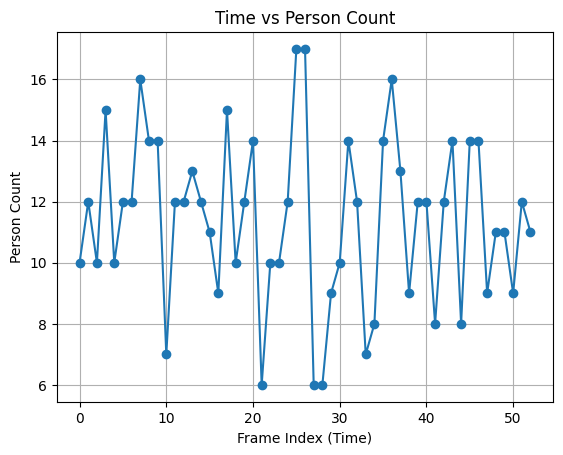

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df["Person_count"], marker='o')
plt.title("Time vs Person Count")
plt.xlabel("Frame Index (Time)")
plt.ylabel("Person Count")
plt.grid(True)
plt.show()

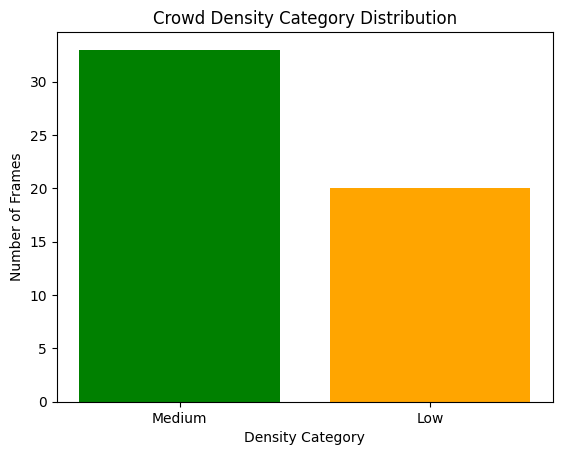

In [ ]:
density_dist = df["density"].value_counts()

plt.bar(density_dist.index, density_dist.values, color=['green', 'orange', 'red'])
plt.title("Crowd Density Category Distribution")
plt.xlabel("Density Category")
plt.ylabel("Number of Frames")
plt.show()


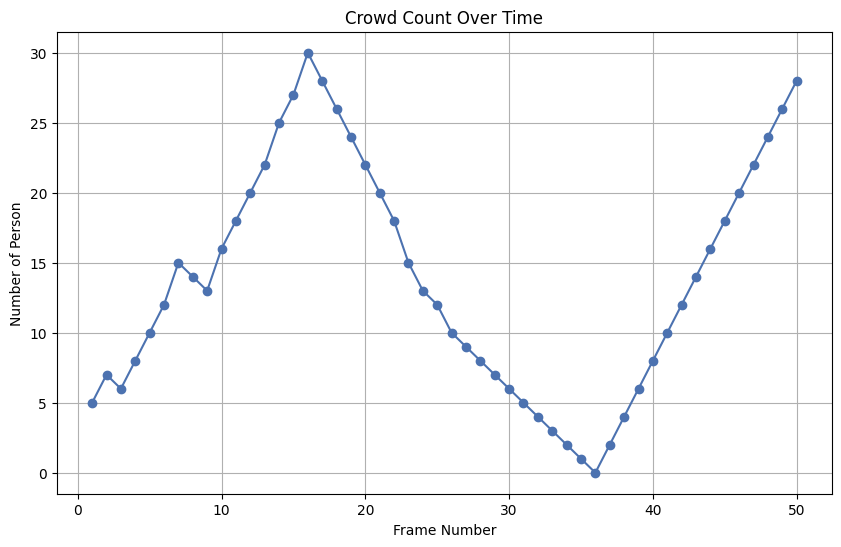

In [ ]:
import matplotlib.pyplot as plt

# Sample data for demonstration
frames = list(range(1, 51))  # Frame numbers from 1 to 50
Person_count = [5, 7, 6, 8, 10, 12, 15, 14, 13, 16, 18, 20, 22, 25, 27, 30, 28, 26, 24, 22, 20, 18, 15, 13, 12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

def plot_crowd_count(frames, counts):
    plt.figure(figsize=(10, 6))
    plt.plot(frames, counts, marker='o', linestyle='-', color='b')
    plt.title('Crowd Count Over Time')
    plt.xlabel('Frame Number')
    plt.ylabel('Number of Person')
    plt.grid(True)
    plt.show()

# The variable 'person_counts' was not defined, it should be 'Person_count'
plot_crowd_count(frames, Person_count) # Changed 'person_counts' to 'Person_count'